## DeepSat (SAT-6) Airborne Dataset Analysis 
+ Purpose is to characterize the DeepSat Data/images into categories accurately
+ First step will be to be able to feed the data into a simple CNN using Batch Normalization and check the performance
+ Simple CNN performance characterized 
    - with 50000 train-images and 4000 test-images
        + {'Accuracy': 0.877, 'Precision': 0.9708216, 'Recall': 0.9918933, 'loss': 0.3487776, 'global_step': 98}
    - with 100000 train-images and 10000 test-images and nearly 2000 Steps
        + {'Accuracy': 0.887, 'Precision': 0.99013156, 'Recall': 0.9774775, 'loss': 0.25368488, 'global_step': 196}

In [1]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
print(tf.__version__)

1.11.0


In [3]:
path_a = os.getcwd()+"\deepsat-sat6"
print(f"path of the project : {path_a}")

# Print the contents of the path
from glob import glob
trainfiles, testfiles = [],[]
to_scan = path_a+"\*.csv"

for f in glob(to_scan):
    print(f)
    if "train" in f: 
        trainfiles.append(f)
    elif "test" in f: 
        testfiles.append(f)

print(trainfiles, testfiles)
# xtrain.iloc[0:0]
# ytrain.iloc[0:0]
# x_train.iloc[0:0]
# y_train.iloc[0:0]
xtrain = pd.read_csv(tf.gfile.Open(trainfiles[0]), nrows=150000, header=None) 
ytrain = pd.read_csv(tf.gfile.Open(trainfiles[1]), nrows=150000, header=None)
x_train = xtrain.values.reshape((xtrain.shape[0],28,28,4)).clip(0,255).astype(np.float32)
y_train = ytrain.values.astype(np.float32)

path of the project : c:\Public\DeepSat\deepsat-sat6
c:\Public\DeepSat\deepsat-sat6\sat6annotations.csv
c:\Public\DeepSat\deepsat-sat6\X_test_sat6.csv
c:\Public\DeepSat\deepsat-sat6\X_train_sat6.csv
c:\Public\DeepSat\deepsat-sat6\y_test_sat6.csv
c:\Public\DeepSat\deepsat-sat6\y_train_sat6.csv
['c:\\Public\\DeepSat\\deepsat-sat6\\X_train_sat6.csv', 'c:\\Public\\DeepSat\\deepsat-sat6\\y_train_sat6.csv'] ['c:\\Public\\DeepSat\\deepsat-sat6\\X_test_sat6.csv', 'c:\\Public\\DeepSat\\deepsat-sat6\\y_test_sat6.csv']


In [4]:
print(x_train.shape, y_train.shape)

(150000, 28, 28, 4) (150000, 6)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

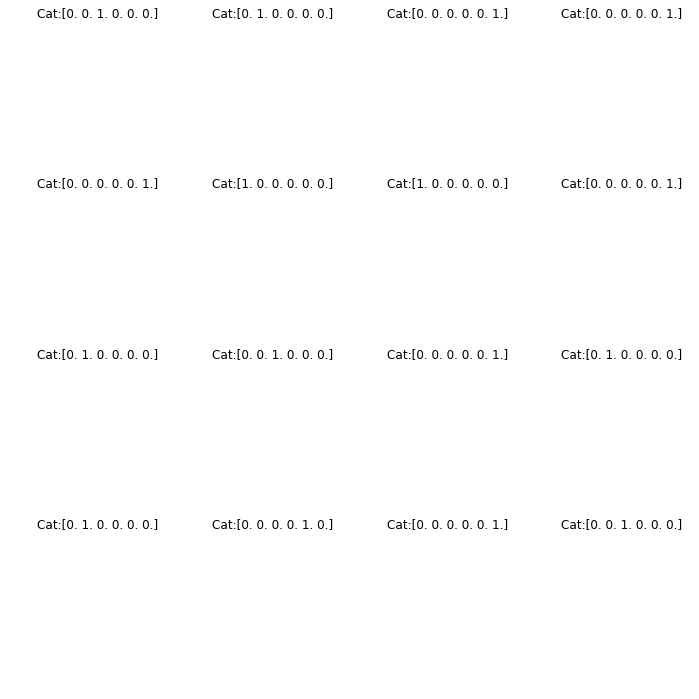

In [5]:
import matplotlib.pyplot as plt
c_train_x, c_train_y = x_train[0:16],y_train[0:16] 
fig, m_axs = plt.subplots(4, c_train_x.shape[0]//4, figsize = (12, 12))
for (x, y, c_ax) in zip(c_train_x, c_train_y, m_axs.flatten()):
    c_ax.imshow(x[:,:,:3],interpolation = 'none')
    c_ax.axis('off')
    c_ax.set_title('Cat:{}'.format(y))

In [6]:
xtest = pd.read_csv(tf.gfile.Open(testfiles[0]), nrows=60000, header=None) 
ytest = pd.read_csv(tf.gfile.Open(testfiles[1]), nrows=60000, header=None)
x_test = xtest.values.reshape((xtest.shape[0],28,28,4)).clip(0,255).astype(np.float32)
y_test = ytest.values.astype(np.float32)

## Put the Tensorflow model in Place 
+ Simple CNN with no Batch Normalization
+ Simple CNN with Batch Normalization
+ Simple CNN with Group Normalization

In [7]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(150000, 28, 28, 4) (150000, 6) (60000, 28, 28, 4) (60000, 6)


In [13]:
'''
Without any Batch Normalization
'''
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# Imports
import numpy as np
import tensorflow as tf
import argparse
import os
import sys

FLAGS=None

tf.logging.set_verbosity(tf.logging.INFO)

# Our application logic will be added here
def cnn_model_fn(features, labels, mode, params, config):
    #Input layer
    input_layer = tf.reshape(features["x"], [-1, 28, 28, 4])
    
    # Convolutional Layer #1
    conv1=tf.layers.conv2d(
            inputs=input_layer,
            filters=32,
            kernel_size=[5,5],
            padding="same",
            activation=tf.nn.relu6)
    
    print("Shape Conv1:" + str(conv1.shape))
    
    # First Max Pooling layer
    pool1=tf.layers.max_pooling2d(inputs=conv1, pool_size=[2,2], strides=2) #strides=2 . Divide size by 2
    
    print("Shape Pool1:" + str(pool1.shape))
    
    # Convolutional Layer #2
    conv2=tf.layers.conv2d(
            inputs=pool1,
            filters=64,
            kernel_size=[5,5],
            padding="same",
            activation=tf.nn.relu6)
    
    print("Shape Conv2:" + str(conv2.shape))
    
    # Second Max Pooling layer
    pool2=tf.layers.max_pooling2d(inputs=conv2, pool_size=[2,2], strides=2) #strides=2 . Divide size by 2
    
    print("Shape Pool2:" + str(pool2.shape))
    
    #Flatten Pool 2
    pool2_flat = tf.reshape(pool2, [-1, int(pool2.shape[1]) * int(pool2.shape[2]) * int(pool2.shape[3])])
    
    #Dense Layer
    dense1 = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu6)
    
    #Dropout
    dropout = tf.layers.dropout(inputs=dense1, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)
    
    # Second Dense Layer
    dense2 = tf.layers.dense(inputs=dropout, units=256, activation=tf.nn.relu6)
    
    #Output layer final
    logits = tf.layers.dense(inputs=dense2, units=labels.shape[1])
    
    predictions = {
        "classes": tf.argmax(input=logits, axis=1),
        "probabilities": tf.nn.softmax(logits, name="softmax_tensor"),
        "logits":logits
    }
    
    # Predict Mode
    if mode==tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)
    
    # Loss Function
    loss = tf.losses.softmax_cross_entropy(onehot_labels=labels, logits=logits)
    loss = tf.identity(loss, name="loss")
    
    
    # Classification Metrics
    # accuracy
    acc  = tf.metrics.accuracy(labels=tf.argmax(labels,1), predictions=predictions['classes'])
    
    # Precision
    prec = tf.metrics.precision(labels=tf.argmax(labels,1), predictions=predictions['classes'])
    
    # Recall
    rec = tf.metrics.recall(labels=tf.argmax(labels,1), predictions=predictions['classes'])
    
    # F1 Score
    f1 = 2 * acc[1] * rec[1] /(prec[1] + rec[1]) 
    
    
    #TensorBoard Summary
    with tf.name_scope('summaries'):
        tf.summary.scalar('Accuracy', acc[1])
        tf.summary.scalar('Precision', prec[1])
        tf.summary.scalar('Recall', rec[1])
        tf.summary.scalar('F1Score', f1)
        tf.summary.histogram('Probabilities', predictions['probabilities'])
        tf.summary.histogram('Classes', predictions['classes'])
    
    summary_hook = tf.train.SummarySaverHook(summary_op=tf.summary.merge_all(),save_steps=1)
    
    # Learning Rate Decay (Exponential)
    learning_rate = tf.train.exponential_decay(learning_rate=1e-04,
                                               global_step=tf.train.get_global_step(),
                                               decay_steps=10000, 
                                               decay_rate=0.96, 
                                               staircase=True,
                                               name='lr_exp_decay')
    
    # Configure the Training Op (for TRAIN mode)
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
        train_op = optimizer.minimize(
            loss=loss,
            global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)
    
    
    # Evaluation Metrics
    eval_metric_ops = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
    }
    
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

In [44]:
'''
With Batch Normalization + Fully connected
'''
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# Imports
import numpy as np
import tensorflow as tf
import argparse
import os
import sys

FLAGS=None

tf.logging.set_verbosity(tf.logging.INFO)

def batch_norm_wrapper(inputs, is_training, decay = 0.999):
    epsilon = 1e-3
    scale = tf.Variable(tf.ones([inputs.get_shape()[-1]]))
    beta = tf.Variable(tf.zeros([inputs.get_shape()[-1]]))
    pop_mean = tf.Variable(tf.zeros([inputs.get_shape()[-1]]), trainable=False)
    pop_var = tf.Variable(tf.ones([inputs.get_shape()[-1]]), trainable=False)

    if is_training:
        batch_mean, batch_var = tf.nn.moments(inputs,[0])
        train_mean = tf.assign(pop_mean,
                               pop_mean * decay + batch_mean * (1 - decay))
        train_var = tf.assign(pop_var,
                              pop_var * decay + batch_var * (1 - decay))
        with tf.control_dependencies([train_mean, train_var]):
            return tf.nn.batch_normalization(inputs,
                batch_mean, batch_var, beta, scale, epsilon)
    else:
        return tf.nn.batch_normalization(inputs,
            pop_mean, pop_var, beta, scale, epsilon)

# Our application logic will be added here
def cnn_model_bn_fn(features, labels, mode, params, config):
    
    #Input layer
    input_layer = tf.reshape(features["x"], [-1, 28, 28, 4])
    
    # Convolutional Layer #1
    conv1=tf.layers.conv2d(
            inputs=input_layer,
            filters=32,
            kernel_size=[5,5],
            padding="same",
            activation=tf.nn.relu6)
    
    print("Shape Conv1:" + str(conv1.shape))
    
    # First Max Pooling layer
    pool1=tf.layers.max_pooling2d(inputs=conv1, pool_size=[2,2], strides=2) #strides=2 . Divide size by 2
    
    print("Shape Pool1:" + str(pool1.shape))
    
    # Convolutional Layer #2
    conv2=tf.layers.conv2d(
            inputs=pool1,
            filters=64,
            kernel_size=[5,5],
            padding="same",
            activation=tf.nn.relu6)
    
    print("Shape Conv2:" + str(conv2.shape))
    
    # Second Max Pooling layer
    pool2=tf.layers.max_pooling2d(inputs=conv2, pool_size=[2,2], strides=2) #strides=2 . Divide size by 2
    
    print("Shape Pool2:" + str(pool2.shape))
    
    #Flatten Pool 2
    pool2_flat = tf.reshape(pool2, [-1, int(pool2.shape[1]) * int(pool2.shape[2]) * int(pool2.shape[3])])
    
    #Dense Layer
    dense1 = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu6)
    
    #Dropout
    dropout = tf.layers.dropout(inputs=dense1, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)
    
    # Second Dense Layer
    #dense2 = tf.layers.dense(inputs=dropout, units=256, activation=tf.nn.relu6)
    
    #Add Batch Normalization layer here
#     if mode==tf.estimator.ModeKeys.TRAIN:
#         batch_mean2, batch_var2 = tf.nn.moments(dropout,[0])
#         scale2 = tf.Variable(tf.ones([1024]))
#         beta2 = tf.Variable(tf.zeros([1024]))
#         dense2 = tf.nn.batch_normalization(dropout,batch_mean2,batch_var2,beta2,scale2,epsilon)
#     else:
#         dense2 = tf.layers.dense(inputs=dropout, units=256, activation=tf.nn.relu6)
    
    # Second Dense Layer
    dense2 = batch_norm_wrapper(dropout, is_training=mode == tf.estimator.ModeKeys.TRAIN)
    
    #Output layer final
    logits = tf.layers.dense(inputs=dense2, units=labels.shape[1])
    
    predictions = {
        "classes": tf.argmax(input=logits, axis=1),
        "probabilities": tf.nn.softmax(logits, name="softmax_tensor"),
        "logits":logits
    }
    
    # Predict Mode
    if mode==tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)
    
    # Loss Function
    loss = tf.losses.softmax_cross_entropy(onehot_labels=labels, logits=logits)
    loss = tf.identity(loss, name="loss")
    
    
    # Classification Metrics
    # accuracy
    acc  = tf.metrics.accuracy(labels=tf.argmax(labels,1), predictions=predictions['classes'])
    
    # Precision
    prec = tf.metrics.precision(labels=tf.argmax(labels,1), predictions=predictions['classes'])
    
    # Recall
    rec = tf.metrics.recall(labels=tf.argmax(labels,1), predictions=predictions['classes'])
    
    # F1 Score
    f1 = 2 * acc[1] * rec[1] /(prec[1] + rec[1]) 
    
    
    #TensorBoard Summary
    with tf.name_scope('summaries'):
        tf.summary.scalar('Accuracy', acc[1])
        tf.summary.scalar('Precision', prec[1])
        tf.summary.scalar('Recall', rec[1])
        tf.summary.scalar('F1Score', f1)
        tf.summary.histogram('Probabilities', predictions['probabilities'])
        tf.summary.histogram('Classes', predictions['classes'])
    
    summary_hook = tf.train.SummarySaverHook(summary_op=tf.summary.merge_all(),save_steps=1)
    
    # Learning Rate Decay (Exponential)
    learning_rate = tf.train.exponential_decay(learning_rate=1e-04,
                                               global_step=tf.train.get_global_step(),
                                               decay_steps=10000, 
                                               decay_rate=0.96, 
                                               staircase=True,
                                               name='lr_exp_decay')
    
    # Configure the Training Op (for TRAIN mode)
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
        train_op = optimizer.minimize(
            loss=loss,
            global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)
    
    
    # Evaluation Metrics
    eval_metric_ops = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
    }
    
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)


In [47]:
'''
Printing out the losses per step
- Number of steps kept at 1 
- Number of epochs kept at 3 each for train and test
- 20 iterations for 50% of the training data and 75% of the test data 
- With Batch Normalization used
- Storing and printing the Loss and the accuracy to be plotted, this can be plotted on tensorboard
'''
loss_, accuracy_=[],[]
sat6_classifier = tf.estimator.Estimator(model_fn=cnn_model_bn_fn, model_dir="C:/Public/DeepSat/cnn_model/5",
                                         config=tf.estimator.RunConfig())
tensors_to_log={"probabilities":"softmax_tensor", "loss":"loss"}
loss_.append(tensors_to_log["loss"])
logging_hook=tf.train.LoggingTensorHook(tensors=tensors_to_log, every_n_iter=10)
# Training input function
train_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": x_train},
                                                    y=y_train,
                                                    batch_size=512,
                                                    num_epochs=3,
                                                    shuffle=True)
# Evaluation input function
eval_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": x_test},
                                                   y=y_test,
                                                   num_epochs=3,
                                                   shuffle=False)

# Rerun with larger number of steps
from collections import defaultdict
store_dict=defaultdict(dict)
for i in range(20):
    print(f"This is the {i} iteration")
    sat6_classifier.train(input_fn=train_input_fn, steps=200, hooks=[logging_hook])
    eval_results=sat6_classifier.evaluate(input_fn=eval_input_fn)
    print(f"Results for {i} iteration {eval_results}")
    store_dict.update(eval_results)

INFO:tensorflow:Using config: {'_model_dir': 'C:/Public/DeepSat/cnn_model/5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000000051712400>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
This is the 0 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7

INFO:tensorflow:loss = 0.36257315, probabilities = [[0.00265888 0.0111092  0.9687837  0.01416771 0.00186128 0.00141921]
 [0.00322472 0.95787394 0.00141582 0.0354539  0.00182991 0.00020176]
 [0.00624645 0.0002118  0.003638   0.00050716 0.0168933  0.97250324]
 ...
 [0.11690933 0.00018614 0.00227002 0.00074723 0.07921788 0.8006694 ]
 [0.00989972 0.5457495  0.19425592 0.15371698 0.09064074 0.0057372 ]
 [0.00328707 0.00741224 0.8053587  0.18001525 0.003853   0.00007375]] (9.170 sec)
INFO:tensorflow:loss = 0.30377412, probabilities = [[0.00058433 0.00190902 0.05504686 0.942106   0.00033117 0.00002259]
 [0.00442537 0.9606238  0.00194151 0.02690306 0.0060802  0.00002607]
 [0.00173507 0.00004866 0.00082613 0.00007344 0.00138252 0.9959341 ]
 ...
 [0.06691155 0.00133099 0.00085619 0.00022981 0.00794135 0.92273015]
 [0.11709409 0.00035885 0.01495141 0.00297065 0.02897134 0.83565366]
 [0.01717165 0.9082983  0.00564221 0.06410973 0.00467188 0.00010619]] (9.315 sec)
INFO:tensorflow:loss = 0.3757958, 

INFO:tensorflow:loss = 0.23980115, probabilities = [[0.00045178 0.000175   0.00003341 0.0000395  0.00313676 0.9961636 ]
 [0.00530006 0.0002847  0.9910958  0.00140148 0.00186263 0.00005542]
 [0.0327633  0.9360748  0.00204353 0.02287273 0.00615186 0.0000938 ]
 ...
 [0.00099357 0.00000177 0.00003547 0.00000804 0.00060057 0.9983606 ]
 [0.00365762 0.9757992  0.00501612 0.01254676 0.00274949 0.00023091]
 [0.00314802 0.00003373 0.00005224 0.00001469 0.00028    0.9964713 ]] (8.747 sec)
INFO:tensorflow:loss = 0.22455838, probabilities = [[0.00119725 0.9929843  0.00004262 0.00553832 0.00022928 0.0000083 ]
 [0.00004563 0.00000933 0.0000084  0.00000977 0.00374435 0.9961825 ]
 [0.00566724 0.00018619 0.00095654 0.00005979 0.01545499 0.97767526]
 ...
 [0.00739673 0.05005325 0.0628825  0.8693436  0.00975977 0.00056425]
 [0.00152209 0.0000261  0.0010463  0.0000199  0.00079361 0.99659204]
 [0.00511581 0.98499656 0.00055752 0.00431472 0.00464771 0.00036766]] (8.745 sec)
INFO:tensorflow:global_step/sec: 1

INFO:tensorflow:loss = 0.19596112, probabilities = [[0.00033408 0.00240822 0.9923401  0.00451428 0.00039067 0.00001267]
 [0.00136539 0.00017236 0.001071   0.0000526  0.00082586 0.99651283]
 [0.00014064 0.00000257 0.00001977 0.00000602 0.00003181 0.9997992 ]
 ...
 [0.28290144 0.0090147  0.01442564 0.01903844 0.67308056 0.00153918]
 [0.00193696 0.00018229 0.00038342 0.00009925 0.0130833  0.98431474]
 [0.00321797 0.00003596 0.0012067  0.00004337 0.00259943 0.9928966 ]] (8.771 sec)
INFO:tensorflow:loss = 0.27605623, probabilities = [[0.00031415 0.00041661 0.9222171  0.07578835 0.0012278  0.0000361 ]
 [0.00117818 0.48189571 0.01137472 0.49817273 0.00713705 0.00024158]
 [0.00196201 0.00175669 0.01055669 0.98454535 0.00101573 0.00016362]
 ...
 [0.00255119 0.98717624 0.00031851 0.00856916 0.0012891  0.0000958 ]
 [0.00024968 0.01380058 0.00729687 0.9747002  0.00391476 0.0000379 ]
 [0.75993204 0.00202615 0.01011041 0.00335019 0.22369847 0.00088263]] (8.711 sec)
INFO:tensorflow:loss = 0.1902594, 

INFO:tensorflow:loss = 0.19028315, probabilities = [[0.00230218 0.9902974  0.00004798 0.00643264 0.00091131 0.00000846]
 [0.00413413 0.00239986 0.99013853 0.00288044 0.00044507 0.00000204]
 [0.00154621 0.00000528 0.00004376 0.00000344 0.00131738 0.99708396]
 ...
 [0.00098919 0.00000214 0.00020159 0.00001315 0.00044001 0.99835396]
 [0.01249381 0.00005937 0.00037833 0.00002766 0.00309759 0.9839432 ]
 [0.00042891 0.0203588  0.01103842 0.96616036 0.00190445 0.00010903]] (8.689 sec)
INFO:tensorflow:Saving checkpoints for 600 into C:/Public/DeepSat/cnn_model/5\model.ckpt.
INFO:tensorflow:Loss for final step: 0.2632625.
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-07-07:52:18
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Public/DeepSat/cnn_model/5\model.ckpt-600
INFO:tensorfl

INFO:tensorflow:loss = 0.21676691, probabilities = [[0.01094019 0.00279802 0.97942984 0.00277343 0.00369589 0.00036262]
 [0.00044601 0.99763167 0.00002003 0.0018645  0.0000376  0.0000003 ]
 [0.00005642 0.00000324 0.00001589 0.00000096 0.00034245 0.99958104]
 ...
 [0.0002907  0.00189707 0.00502546 0.98792166 0.00478262 0.00008249]
 [0.00554823 0.07848896 0.0089415  0.90518194 0.00179491 0.00004441]
 [0.00337445 0.9897277  0.00108357 0.00461027 0.00117618 0.00002784]] (8.787 sec)
INFO:tensorflow:loss = 0.19903664, probabilities = [[0.00018815 0.0000088  0.00102885 0.0000016  0.00009353 0.9986791 ]
 [0.00151869 0.9190004  0.00074228 0.07639688 0.00230933 0.0000323 ]
 [0.00216736 0.96103054 0.00076004 0.03400913 0.00200753 0.00002545]
 ...
 [0.02376239 0.00062819 0.00013964 0.00122765 0.02876919 0.9454729 ]
 [0.00062319 0.00020872 0.9977628  0.00089538 0.00050108 0.00000886]
 [0.00015804 0.00036063 0.9991109  0.00019006 0.00017572 0.00000461]] (8.706 sec)
INFO:tensorflow:loss = 0.18368158,

INFO:tensorflow:loss = 0.14585738, probabilities = [[0.00037862 0.0006613  0.99491996 0.00289998 0.00113488 0.00000521]
 [0.0034463  0.00263689 0.9830761  0.00985153 0.00097228 0.000017  ]
 [0.01338084 0.01515353 0.42880407 0.52657694 0.01581176 0.00027279]
 ...
 [0.08943149 0.0004449  0.00004867 0.00010312 0.7874412  0.12253063]
 [0.00399247 0.21747924 0.0227057  0.75113374 0.00467193 0.00001695]
 [0.00879182 0.95587337 0.00103259 0.02686736 0.00740569 0.00002914]] (8.726 sec)
INFO:tensorflow:loss = 0.17236276, probabilities = [[0.00009149 0.00044385 0.99509096 0.0038569  0.00050171 0.00001502]
 [0.00078003 0.00000127 0.00014398 0.00000202 0.00076928 0.9983034 ]
 [0.0012302  0.00000609 0.00000578 0.00001099 0.00082913 0.99791783]
 ...
 [0.00116851 0.00163557 0.98486644 0.01091381 0.00139607 0.00001963]
 [0.00044306 0.000109   0.99691725 0.00021229 0.00228071 0.0000378 ]
 [0.00066445 0.9707451  0.00013647 0.02797735 0.00044076 0.00003589]] (8.729 sec)
INFO:tensorflow:loss = 0.15709263,

INFO:tensorflow:loss = 0.14914668, step = 1001
INFO:tensorflow:loss = 0.14035401, probabilities = [[0.00028261 0.0003682  0.99549013 0.00140915 0.0024116  0.00003835]
 [0.00013337 0.9975617  0.00002811 0.00208758 0.00018439 0.00000481]
 [0.00005627 0.99915457 0.0000135  0.00072011 0.000055   0.00000055]
 ...
 [0.00416869 0.00590378 0.06998475 0.9170536  0.00272817 0.00016098]
 [0.00044499 0.00832367 0.00602234 0.98295367 0.00225205 0.00000324]
 [0.5497055  0.00089782 0.00064996 0.00437672 0.44406042 0.0003095 ]] (8.928 sec)
INFO:tensorflow:loss = 0.15458, probabilities = [[0.04929674 0.00017317 0.00189064 0.00037795 0.00704303 0.9412185 ]
 [0.00015382 0.9988456  0.00006829 0.00090934 0.00002196 0.00000092]
 [0.00018875 0.00000213 0.00001312 0.00000129 0.00068159 0.99911314]
 ...
 [0.00011596 0.00000064 0.00002791 0.0000027  0.00005998 0.9997929 ]
 [0.00024481 0.00000206 0.00000527 0.00000136 0.00018943 0.9995571 ]
 [0.00271867 0.06613716 0.02304956 0.90445954 0.00333528 0.00029979]] (8

INFO:tensorflow:loss = 0.13200457, probabilities = [[0.00247618 0.9802659  0.00020506 0.0166643  0.00037648 0.00001204]
 [0.00076879 0.00008272 0.00061828 0.00001683 0.00170204 0.99681133]
 [0.00106527 0.02049976 0.0026649  0.974194   0.00155942 0.00001662]
 ...
 [0.00133121 0.96408623 0.0001081  0.03408359 0.00038754 0.00000326]
 [0.00011755 0.00045335 0.99180555 0.00630518 0.00131131 0.00000702]
 [0.00006241 0.9993094  0.00001405 0.00060416 0.00000979 0.00000009]] (8.792 sec)
INFO:tensorflow:loss = 0.15417078, probabilities = [[0.0003156  0.00005407 0.99886787 0.00061768 0.00013849 0.00000631]
 [0.00023088 0.9909581  0.00002522 0.00846874 0.00031636 0.00000087]
 [0.04699988 0.00003749 0.00023016 0.00005061 0.9512793  0.00140251]
 ...
 [0.00028665 0.0016234  0.00180838 0.99596643 0.00030539 0.00000977]
 [0.00002066 0.0000517  0.999877   0.00003643 0.00001134 0.00000284]
 [0.00218562 0.01550241 0.5125828  0.46456766 0.0050426  0.0001189 ]] (8.690 sec)
INFO:tensorflow:Saving checkpoints

INFO:tensorflow:loss = 0.17728902, probabilities = [[0.00184916 0.9839167  0.00003468 0.00941616 0.00477223 0.00001098]
 [0.00113697 0.00001081 0.00060124 0.00004093 0.00058447 0.99762565]
 [0.00142631 0.00000311 0.00004681 0.00001415 0.00023268 0.99827695]
 ...
 [0.01847356 0.00088865 0.9707888  0.00881678 0.00084905 0.00018315]
 [0.00071747 0.00000097 0.00031399 0.00001224 0.0010273  0.997928  ]
 [0.00014198 0.9943178  0.00001987 0.004882   0.0006363  0.00000205]] (8.911 sec)
INFO:tensorflow:loss = 0.14539176, probabilities = [[0.00427782 0.00000798 0.00034828 0.00008293 0.00108963 0.9941934 ]
 [0.00482523 0.8892461  0.00031418 0.10530075 0.00027908 0.00003463]
 [0.00341056 0.0000349  0.00063936 0.0002419  0.01606461 0.9796087 ]
 ...
 [0.01871597 0.8461259  0.03137505 0.09849574 0.00521445 0.00007285]
 [0.00000745 0.00001412 0.99974936 0.00022447 0.00000467 0.00000002]
 [0.00465627 0.0001033  0.00019083 0.00005896 0.02555345 0.9694372 ]] (8.815 sec)
INFO:tensorflow:loss = 0.19553484,

INFO:tensorflow:loss = 0.17184535, probabilities = [[0.00057716 0.00006636 0.00046988 0.00009848 0.00380505 0.9949831 ]
 [0.00038905 0.00000127 0.00000358 0.00001954 0.00147438 0.9981122 ]
 [0.00009032 0.9993174  0.00003342 0.00033673 0.00022174 0.00000041]
 ...
 [0.00003723 0.00001288 0.99919134 0.00056091 0.00018773 0.00000989]
 [0.00105072 0.00013946 0.00363521 0.00003831 0.00516877 0.9899676 ]
 [0.00067796 0.00022274 0.998085   0.0009623  0.00004523 0.00000674]] (8.829 sec)
INFO:tensorflow:loss = 0.17317703, probabilities = [[0.8044314  0.00287367 0.00051098 0.00289505 0.17733836 0.01195051]
 [0.00223119 0.00239605 0.69237226 0.3010871  0.00187888 0.00003451]
 [0.00007123 0.9982502  0.00010526 0.00143164 0.00013902 0.00000248]
 ...
 [0.00030229 0.00000688 0.000093   0.00001043 0.00010652 0.9994809 ]
 [0.0000772  0.00000188 0.00004172 0.0000093  0.00040761 0.9994623 ]
 [0.00009913 0.00000037 0.00000698 0.00000105 0.00008011 0.9998124 ]] (8.874 sec)
INFO:tensorflow:loss = 0.14077875,

INFO:tensorflow:Restoring parameters from C:/Public/DeepSat/cnn_model/5\model.ckpt-1600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1600 into C:/Public/DeepSat/cnn_model/5\model.ckpt.
INFO:tensorflow:loss = 0.15408254, probabilities = [[0.00007342 0.9923488  0.00002351 0.007349   0.00020431 0.00000099]
 [0.00074966 0.9684461  0.00093568 0.02963532 0.00022562 0.00000759]
 [0.00777724 0.00007323 0.00046856 0.00002502 0.00390825 0.98774767]
 ...
 [0.00014545 0.00003199 0.00008324 0.00000953 0.0001163  0.99961346]
 [0.00085923 0.98015356 0.00302101 0.0141802  0.00177247 0.00001343]
 [0.00028749 0.00000401 0.00009058 0.00000475 0.00326105 0.9963521 ]]
INFO:tensorflow:loss = 0.15408254, step = 1601
INFO:tensorflow:loss = 0.15675604, probabilities = [[0.00346726 0.00065686 0.97731835 0.00994734 0.00856529 0.00004498]
 [0.00024659 0.99615437 0.00002576 0.00256931 0.00099183 0.00001214]
 [0.00034007 0.9921916  0.00005

INFO:tensorflow:loss = 0.17033549, probabilities = [[0.00184018 0.95279324 0.00256742 0.0414595  0.00131983 0.00001986]
 [0.00005114 0.00032337 0.00223949 0.9969753  0.00040825 0.0000025 ]
 [0.00009328 0.00106972 0.00024134 0.99838674 0.00020841 0.00000063]
 ...
 [0.00388757 0.984029   0.00013925 0.0114616  0.0004791  0.00000349]
 [0.00003    0.00010192 0.99955827 0.00019627 0.00010828 0.00000521]
 [0.00281524 0.00000829 0.00001178 0.00004062 0.00113179 0.99599236]] (8.752 sec)
INFO:tensorflow:loss = 0.13244, probabilities = [[0.00055587 0.00000097 0.00001652 0.00000092 0.00011762 0.9993081 ]
 [0.00008776 0.9980507  0.00000538 0.00181287 0.00004318 0.00000016]
 [0.00002328 0.99921787 0.00000837 0.00062742 0.00011838 0.00000475]
 ...
 [0.00020065 0.0000043  0.0000499  0.00000709 0.0000589  0.9996792 ]
 [0.00129661 0.9614358  0.00081876 0.03581556 0.00062921 0.00000405]
 [0.00017894 0.00007632 0.99399936 0.00531419 0.00041663 0.00001462]] (8.785 sec)
INFO:tensorflow:loss = 0.13709761, pr

INFO:tensorflow:loss = 0.16265455, step = 1901 (88.343 sec)
INFO:tensorflow:loss = 0.12433414, probabilities = [[0.00025391 0.0000528  0.00002278 0.00003705 0.00166445 0.997969  ]
 [0.00053801 0.00530404 0.03733863 0.9523893  0.00433537 0.00009455]
 [0.00035271 0.0000007  0.00006325 0.00002163 0.0001299  0.9994318 ]
 ...
 [0.00045172 0.00000128 0.00003309 0.00000062 0.00002749 0.99948573]
 [0.8308163  0.00209984 0.00750101 0.04044702 0.11904938 0.00008637]
 [0.00139575 0.8826376  0.00014105 0.11318585 0.00256967 0.00007004]] (8.983 sec)
INFO:tensorflow:loss = 0.21354058, probabilities = [[0.00028716 0.00000143 0.00000815 0.00000266 0.00535933 0.99434125]
 [0.00203356 0.13812569 0.03445909 0.8220406  0.00314616 0.00019494]
 [0.00028387 0.9891713  0.00020504 0.00977161 0.00055912 0.00000896]
 ...
 [0.00231547 0.00101583 0.98471606 0.01176538 0.00017753 0.00000971]
 [0.00000483 0.00001269 0.99723357 0.00271648 0.0000323  0.00000013]
 [0.00767643 0.00012155 0.00126772 0.00003397 0.001905  

INFO:tensorflow:loss = 0.1195249, probabilities = [[0.001354   0.004565   0.98607975 0.00575035 0.00220115 0.0000498 ]
 [0.00006907 0.99975973 0.00000405 0.00015426 0.00001286 0.00000006]
 [0.00049959 0.00003359 0.00001089 0.00000442 0.00080753 0.99864393]
 ...
 [0.00064877 0.00002318 0.00008284 0.00000661 0.00079554 0.99844307]
 [0.0087318  0.00007573 0.00031332 0.00006597 0.00600511 0.9848081 ]
 [0.00798968 0.30844426 0.00235395 0.6802695  0.00086425 0.00007843]] (8.786 sec)
INFO:tensorflow:loss = 0.12612005, probabilities = [[0.00022891 0.00005344 0.9989594  0.00064568 0.00010951 0.00000294]
 [0.00001165 0.00000008 0.00000062 0.00000061 0.0000207  0.9999664 ]
 [0.00764997 0.93741447 0.04001746 0.01342454 0.0014373  0.00005616]
 ...
 [0.00028333 0.9587158  0.00014561 0.03964768 0.00116154 0.00004605]
 [0.00241099 0.26176918 0.00366746 0.7287302  0.00327348 0.0001486 ]
 [0.02095793 0.38610715 0.08383667 0.4784405  0.03053519 0.00012259]] (8.880 sec)
INFO:tensorflow:loss = 0.10429013, 

Results for 10 iteration {'Accuracy': 0.9500667, 'Precision': 0.99957275, 'Recall': 0.980425, 'loss': 0.12892833, 'global_step': 2200}
This is the 11 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Public/DeepSat/cnn_model/5\model.ckpt-2200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 2200 into C:/Public/DeepSat/cnn_model/5\model.ckpt.
INFO:tensorflow:loss = 0.14987858, probabilities = [[0.00006153 0.98170495 0.00007694 0.01728691 0.0008633  0.0000063 ]
 [0.00013313 0.00001521 0.0000099  0.00000159 0.00042194 0.99941826]
 [0.00008025 0.99188423 0.00007093 0.00765195 0.00031141 0.0000012 ]
 ...
 [0.00001051 0.99691844 0.00000234 0.00306252 0.000

INFO:tensorflow:loss = 0.25532854, probabilities = [[0.00361452 0.2640357  0.08465608 0.6345529  0.01292254 0.00021823]
 [0.00008298 0.00000048 0.00002028 0.00000146 0.00017362 0.9997212 ]
 [0.00090924 0.00001581 0.00002604 0.00000276 0.00019727 0.9988489 ]
 ...
 [0.00078859 0.0051049  0.80268186 0.17651905 0.01481282 0.00009284]
 [0.00015679 0.0006151  0.9881216  0.00955878 0.00140592 0.00014186]
 [0.9917013  0.00038341 0.00141077 0.00174721 0.00462905 0.00012833]] (8.796 sec)
INFO:tensorflow:loss = 0.15519817, probabilities = [[0.96386003 0.01253007 0.00017696 0.00340688 0.02001502 0.00001092]
 [0.973853   0.00018252 0.00002512 0.0004716  0.02545683 0.00001108]
 [0.00013183 0.9990778  0.00004919 0.00067398 0.00006495 0.00000232]
 ...
 [0.00020525 0.9940988  0.00010691 0.00516604 0.00042082 0.00000228]
 [0.00173238 0.0000852  0.00002881 0.00000506 0.00218963 0.99595886]
 [0.0001072  0.9988042  0.00002005 0.00100719 0.0000583  0.00000308]] (8.806 sec)
INFO:tensorflow:loss = 0.12329273,

INFO:tensorflow:global_step/sec: 1.13298
INFO:tensorflow:loss = 0.14444065, probabilities = [[0.00039677 0.02035163 0.00807711 0.97007656 0.00108703 0.00001085]
 [0.00347223 0.00006945 0.0001907  0.0000582  0.00168394 0.99452555]
 [0.00006819 0.00069809 0.00217237 0.9969325  0.00012658 0.00000228]
 ...
 [0.29222205 0.00921444 0.00006797 0.01856267 0.6798973  0.00003553]
 [0.0003983  0.06913684 0.00101562 0.9293039  0.00014166 0.00000362]
 [0.00020726 0.0000034  0.00002199 0.00000805 0.00030652 0.99945277]] (8.731 sec)
INFO:tensorflow:loss = 0.14444065, step = 2501 (88.262 sec)
INFO:tensorflow:loss = 0.1189774, probabilities = [[0.00638069 0.04824338 0.01824932 0.92486614 0.00223832 0.00002221]
 [0.5019038  0.00117453 0.00001144 0.04666008 0.4502381  0.000012  ]
 [0.00000888 0.9996691  0.00000322 0.0003042  0.00001447 0.00000007]
 ...
 [0.00418506 0.00003988 0.00017282 0.00012956 0.00050399 0.9949687 ]
 [0.00076447 0.00001967 0.00087656 0.00000347 0.00067795 0.9976579 ]
 [0.0001917  0.0

INFO:tensorflow:loss = 0.09769449, probabilities = [[0.00350849 0.8246803  0.00199867 0.1621419  0.00753134 0.00013934]
 [0.00034132 0.00000683 0.00007774 0.00000463 0.00025819 0.9993113 ]
 [0.00063631 0.9981388  0.00004817 0.00103328 0.00014278 0.0000006 ]
 ...
 [0.00102091 0.0000015  0.00002773 0.00000032 0.00030235 0.99864715]
 [0.00015881 0.99881184 0.00001603 0.00093784 0.00007449 0.00000078]
 [0.00006677 0.00000301 0.99928147 0.00061176 0.00003544 0.00000143]] (8.813 sec)
INFO:tensorflow:loss = 0.14264408, probabilities = [[0.003143   0.65674406 0.00149884 0.33735433 0.00124334 0.00001639]
 [0.00000311 0.00000227 0.9999609  0.00002447 0.00000929 0.00000001]
 [0.00137465 0.9301159  0.00033387 0.06630949 0.00185555 0.00001048]
 ...
 [0.00065007 0.00016908 0.99498075 0.00153434 0.00264511 0.00002069]
 [0.00023537 0.96444505 0.00008857 0.03460656 0.00061942 0.00000511]
 [0.00006804 0.00000324 0.00001041 0.0000008  0.00107688 0.99884063]] (8.787 sec)
INFO:tensorflow:loss = 0.13464218,

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Public/DeepSat/cnn_model/5\model.ckpt-2800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-07-08:45:41
INFO:tensorflow:Saving dict for global step 2800: Accuracy = 0.96735, Precision = 0.9970485, Recall = 0.9969092, global_step = 2800, loss = 0.09822611
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2800: C:/Public/DeepSat/cnn_model/5\model.ckpt-2800
Results for 13 iteration {'Accuracy': 0.96735, 'Precision': 0.9970485, 'Recall': 0.9969092, 'loss': 0.09822611, 'global_step': 2800}
This is the 14 iteration
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C

INFO:tensorflow:loss = 0.11328163, probabilities = [[0.0007605  0.0000255  0.000334   0.00007902 0.00494192 0.9938591 ]
 [0.00022172 0.00000399 0.0000388  0.00000239 0.00005999 0.9996731 ]
 [0.00002077 0.99907374 0.00000584 0.0008554  0.00004387 0.00000051]
 ...
 [0.0000291  0.00120804 0.99648845 0.00222536 0.00004595 0.00000324]
 [0.0019402  0.00000102 0.00005863 0.00000025 0.00005065 0.9979493 ]
 [0.00000893 0.00003353 0.9995301  0.00035161 0.00007211 0.00000382]] (8.794 sec)
INFO:tensorflow:loss = 0.135497, probabilities = [[0.00280296 0.9898817  0.00008128 0.006444   0.00077877 0.0000112 ]
 [0.00005307 0.00000065 0.00004317 0.0000006  0.00005638 0.9998461 ]
 [0.00033585 0.00000004 0.00002469 0.00000651 0.00005616 0.99957675]
 ...
 [0.00137135 0.9944548  0.00011384 0.00288903 0.00116028 0.00001081]
 [0.00171794 0.0035948  0.43549705 0.54367197 0.01549806 0.00002021]
 [0.00000582 0.00189644 0.00002851 0.9971373  0.00093149 0.00000043]] (8.818 sec)
INFO:tensorflow:loss = 0.09337306, p

INFO:tensorflow:loss = 0.068366915, probabilities = [[0.00148392 0.00000648 0.00019931 0.00000589 0.00011682 0.9981876 ]
 [0.00394608 0.00001503 0.00036094 0.0000052  0.00016108 0.99551165]
 [0.00830022 0.00000254 0.00000855 0.0000027  0.00165293 0.9900331 ]
 ...
 [0.00149333 0.5542657  0.00027265 0.44336432 0.00059817 0.00000579]
 [0.00412712 0.00000095 0.00030349 0.00000133 0.0000874  0.9954797 ]
 [0.00041084 0.9944047  0.00020537 0.00456498 0.00040817 0.00000603]] (8.768 sec)
INFO:tensorflow:global_step/sec: 1.13425
INFO:tensorflow:loss = 0.11253816, probabilities = [[0.00053757 0.01472707 0.00463017 0.9780975  0.00200276 0.00000487]
 [0.00056855 0.00006915 0.9988751  0.00030112 0.00017556 0.00001057]
 [0.00061851 0.00000086 0.00002836 0.00000042 0.00009152 0.99926037]
 ...
 [0.001178   0.98624694 0.0000224  0.0111064  0.00143468 0.00001153]
 [0.00043345 0.00045211 0.9983576  0.00066136 0.00009301 0.00000248]
 [0.00226249 0.87315    0.00051055 0.12281706 0.00124388 0.00001617]] (8.7

INFO:tensorflow:loss = 0.11123122, probabilities = [[0.5477619  0.00528851 0.00175706 0.00158034 0.43223163 0.01138052]
 [0.00004478 0.9992829  0.00001439 0.00034194 0.00031507 0.000001  ]
 [0.0116902  0.01645588 0.9455004  0.01461782 0.01135446 0.00038135]
 ...
 [0.00000138 0.99989355 0.00000151 0.00008568 0.00001778 0.00000002]
 [0.00071938 0.00000504 0.00022576 0.00001771 0.00037665 0.99865544]
 [0.00099321 0.37656146 0.00437722 0.6119431  0.00611724 0.0000077 ]] (9.001 sec)
INFO:tensorflow:loss = 0.096969105, probabilities = [[0.00001719 0.00018741 0.99906033 0.00071548 0.00001859 0.00000092]
 [0.00046634 0.00000008 0.00011359 0.00000126 0.00001606 0.99940264]
 [0.00059982 0.05849077 0.01506261 0.9226939  0.00312718 0.00002561]
 ...
 [0.00008027 0.9980621  0.00001835 0.00149332 0.00034568 0.00000039]
 [0.00188163 0.258559   0.00303695 0.73151284 0.0049714  0.00003822]
 [0.00083864 0.00000022 0.00009389 0.00000106 0.00011453 0.9989517 ]] (8.797 sec)
INFO:tensorflow:loss = 0.11673583

INFO:tensorflow:Saving checkpoints for 3400 into C:/Public/DeepSat/cnn_model/5\model.ckpt.
INFO:tensorflow:Loss for final step: 0.11973445.
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-07-08:58:04
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Public/DeepSat/cnn_model/5\model.ckpt-3400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-07-08:59:47
INFO:tensorflow:Saving dict for global step 3400: Accuracy = 0.96751666, Precision = 0.99536747, Recall = 0.9980268, global_step = 3400, loss = 0.09645283
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 3400: C:/Public/DeepSat/cnn_model/5\model.ckpt-3400
Results for 16 iteration {'Accuracy': 0.96751666, 'Precision': 0.99536747, 'Rec

INFO:tensorflow:loss = 0.08766364, probabilities = [[0.19641455 0.00096282 0.00004114 0.00098767 0.8013211  0.0002727 ]
 [0.00003792 0.00332573 0.00039309 0.99596244 0.00027946 0.00000125]
 [0.76915985 0.05775292 0.00010132 0.01340151 0.15920424 0.00038009]
 ...
 [0.9492596  0.00003493 0.0002462  0.00019247 0.04824637 0.00202033]
 [0.00075137 0.08977695 0.00595796 0.9009791  0.00250689 0.0000277 ]
 [0.08888715 0.00101567 0.00002162 0.00045313 0.67366517 0.23595725]] (8.775 sec)
INFO:tensorflow:loss = 0.09022252, probabilities = [[0.13754973 0.00107977 0.00000098 0.00071407 0.86065465 0.00000077]
 [0.00001171 0.9988217  0.00000404 0.00114829 0.00001391 0.00000042]
 [0.00657821 0.00000181 0.00110636 0.00000656 0.00006908 0.992238  ]
 ...
 [0.00121145 0.89772904 0.00047207 0.09953561 0.00100494 0.00004694]
 [0.00001472 0.99899834 0.00001257 0.00084536 0.00012884 0.00000017]
 [0.00041715 0.0000021  0.00010656 0.00000366 0.00010274 0.9993678 ]] (8.834 sec)
INFO:tensorflow:loss = 0.083314046

INFO:tensorflow:loss = 0.09536682, probabilities = [[0.00023381 0.00000019 0.0000015  0.00000001 0.00011341 0.9996511 ]
 [0.00008077 0.00019127 0.9974764  0.00200078 0.00025048 0.00000038]
 [0.0632014  0.00004168 0.00000432 0.00012289 0.93662864 0.00000109]
 ...
 [0.00002236 0.99944896 0.00000201 0.0004037  0.00012275 0.00000018]
 [0.00071702 0.29292065 0.00171493 0.69996965 0.00460047 0.00007726]
 [0.00103903 0.0050855  0.01536832 0.9766887  0.00177295 0.00004557]] (8.737 sec)
INFO:tensorflow:loss = 0.100336686, probabilities = [[0.00025234 0.00001223 0.0000246  0.00000118 0.00025696 0.99945265]
 [0.00037528 0.00541757 0.1207272  0.8667066  0.00677192 0.00000129]
 [0.00010338 0.98965657 0.00004956 0.01012542 0.00005894 0.00000613]
 ...
 [0.00012792 0.00000599 0.00008568 0.00000115 0.00017349 0.99960583]
 [0.00022122 0.00016452 0.99194556 0.00756094 0.00010601 0.00000166]
 [0.0007387  0.00000141 0.00007931 0.00000132 0.00014929 0.99903   ]] (8.843 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:loss = 0.116787754, probabilities = [[0.00004339 0.00021854 0.00352905 0.996075   0.00013285 0.00000115]
 [0.00004684 0.00000277 0.00001028 0.00000038 0.00023885 0.9997009 ]
 [0.00001045 0.00000303 0.00000614 0.00000204 0.00045456 0.99952376]
 ...
 [0.0004844  0.00000221 0.0000072  0.00000198 0.00026518 0.9992391 ]
 [0.00015509 0.98438305 0.00024559 0.01495296 0.00025694 0.00000622]
 [0.15874764 0.00012639 0.00019556 0.00145154 0.8394219  0.0000569 ]] (8.797 sec)
INFO:tensorflow:loss = 0.081267856, probabilities = [[0.00000375 0.00000054 0.00000403 0.00000096 0.00006854 0.99992216]
 [0.01523205 0.00026128 0.00011489 0.00007296 0.78819716 0.19612174]
 [0.0000931  0.9990471  0.00001273 0.00073936 0.00010734 0.00000041]
 ...
 [0.000474   0.00000088 0.00005361 0.00000532 0.00003597 0.99943024]
 [0.0008035  0.00000099 0.00012914 0.00000314 0.0005734  0.99848986]
 [0.00042884 0.00000015 0.00022524 0.00000099 0.00010877 0.999236  ]] (8.743 sec)
INFO:tensorflow:loss = 0.1282835

INFO:tensorflow:loss = 0.11134208, probabilities = [[0.00002522 0.00004158 0.99961936 0.00027885 0.00003393 0.00000097]
 [0.0005585  0.00002638 0.99798703 0.00060523 0.0008171  0.00000584]
 [0.00010554 0.9640474  0.00000756 0.0355329  0.00030465 0.0000019 ]
 ...
 [0.00042738 0.00000023 0.00000413 0.0000005  0.00001747 0.9995503 ]
 [0.00163054 0.00000303 0.00164284 0.0000035  0.00103448 0.9956856 ]
 [0.00043636 0.00099145 0.9958199  0.00159292 0.00115358 0.00000565]] (8.869 sec)
INFO:tensorflow:Saving checkpoints for 4000 into C:/Public/DeepSat/cnn_model/5\model.ckpt.
INFO:tensorflow:Loss for final step: 0.1002039.
INFO:tensorflow:Calling model_fn.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-07-09:12:11
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:/Public/DeepSat/cnn_model/5\model.ckpt-4000
INFO:tensor

## 2nd Attempt and Tensorboard Implmentation with batch Normalization
 + Add BN
 + Increase the Number of Iterations and do train and test consequtively for each iteration
 + See if we could plot the train and test Losses and include tensorboard
 + Add Group normalization

In [3]:
path_a = os.getcwd()+"\datasets\crawford\deepsat-sat6"
print(f"path of the project : {path_a}")

# Print the contents of the path
from glob import glob
trainfiles, testfiles = [],[]
to_scan = path_a+"\*.csv"

for f in glob(to_scan):
    if "train" in f: 
        trainfiles.append(f)
    elif "test" in f: 
        testfiles.append(f)

# xtrain.iloc[0:0]
# ytrain.iloc[0:0]
# x_train.iloc[0:0]
# y_train.iloc[0:0]
xtrain = pd.read_csv(tf.gfile.Open(trainfiles[0]), nrows=100000, header=None) 
ytrain = pd.read_csv(tf.gfile.Open(trainfiles[1]), nrows=100000, header=None)
x_train = xtrain.values.reshape((xtrain.shape[0],28,28,4)).clip(0,255).astype(np.float32)
y_train = ytrain.values.astype(np.float32)

path of the project : C:\Public\xrelab\Xrelab\final-project\datasets\crawford\deepsat-sat6


In [4]:
xtest = pd.read_csv(tf.gfile.Open(testfiles[0]), nrows=10000, header=None) 
ytest = pd.read_csv(tf.gfile.Open(testfiles[1]), nrows=10000, header=None)
x_test = xtest.values.reshape((xtest.shape[0],28,28,4)).clip(0,255).astype(np.float32)
y_test = ytest.values.astype(np.float32)

In [5]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(100000, 28, 28, 4) (100000, 6) (10000, 28, 28, 4) (10000, 6)


In [8]:
'''
This Block of code is for running 10 bit steps -- Takes 1 hour to run
'''
sat6_classifier = tf.estimator.Estimator(model_fn=cnn_model_fn, model_dir="C:/Public/xrelab/Xrelab/final-project/cnn_model/1",
                                         config=tf.estimator.RunConfig())
tensors_to_log={"probabilities":"softmax_tensor"}
logging_hook=tf.train.LoggingTensorHook(tensors=tensors_to_log, every_n_iter=10)
# Training input function
train_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": x_train},
                                                    y=y_train,
                                                    batch_size=512,
                                                    num_epochs=1,
                                                    shuffle=True)
# Evaluation input function
eval_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": x_test},
                                                   y=y_test,
                                                   num_epochs=1,
                                                   shuffle=False)

# Rerun with larger number of steps
from collections import defaultdict
store_dict=defaultdict(dict)
for i in range(10):
    print(f"This is the {i} iteration")
    sat6_classifier.train(input_fn=train_input_fn, steps=200, hooks=[logging_hook])
    eval_results=sat6_classifier.evaluate(input_fn=eval_input_fn)
    print(f"Results for {i} iteration {eval_results}")
    store_dict.update(eval_results)

INFO:tensorflow:Using config: {}
This is the 0 iteration
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:/Public/xrelab/Xrelab/final-project/cnn_model/3\model.ckpt.
INFO:tensorflow:loss = 2.9967496, step = 1
INFO:tensorflow:probabilities = [[0.44326475 0.38657057 0.01276328 0.01437679 0.00186453 0.14116006]
 [0.5243425  0.30344936 0.01841494 0.14358728 0.00008088 0.01012498]
 [0.00635861 0.00439351 0.9015279  0.00265788 0.01333319 0.07172891]
 ...
 [0.02504102 0.26824757 0.6322079  0.02967629 0.02808328 0.01674398]
 [0.03378735 0.3481037  0.49353144 0.00370811 0.00485719 0.11601221]
 [0.01429776 0.9685969  0.00236859 0.0028109  0.00957212 0.00235375]]
INFO:tensorflow:probabilities = [[0.00104957 0.00892328 0.00107705 0.02309132 0.09553459 0.87032425]
 [0.01096121 0.01058851 0.6773002  0.2808375  0.01900491 0.00130756]
 [0.07293166 0.0

INFO:tensorflow:probabilities = [[0.7884745  0.02829888 0.00662337 0.00558231 0.1563734  0.0146476 ]
 [0.06979083 0.05510643 0.10790085 0.7566445  0.00466912 0.0058882 ]
 [0.00902423 0.7641841  0.03292896 0.18495505 0.0087748  0.00013286]
 ...
 [0.00095094 0.00002687 0.00032006 0.00004531 0.00126319 0.9973936 ]
 [0.00328564 0.00053756 0.00019979 0.00002897 0.00010945 0.99583864]
 [0.00319562 0.08780746 0.06839474 0.8384733  0.00182875 0.00030004]] (31.189 sec)
INFO:tensorflow:probabilities = [[0.00007444 0.0000009  0.00028801 0.00000717 0.00120602 0.99842346]
 [0.01873332 0.0000643  0.00010158 0.00002198 0.01584711 0.9652317 ]
 [0.71462125 0.1002131  0.01696564 0.00645248 0.1431292  0.01861826]
 ...
 [0.00238014 0.00003867 0.00389321 0.00001945 0.01041768 0.9832509 ]
 [0.00090883 0.34670743 0.00066589 0.6514629  0.00021952 0.0000353 ]
 [0.23404084 0.23189834 0.00759244 0.03948643 0.40231004 0.08467186]] (29.946 sec)
INFO:tensorflow:probabilities = [[0.0004252  0.00071972 0.9929236  0.0

INFO:tensorflow:Saving checkpoints for 981 into C:/Public/xrelab/Xrelab/final-project/cnn_model/3\model.ckpt.
INFO:tensorflow:loss = 0.21941918, step = 981
INFO:tensorflow:global_step/sec: 0.417501
INFO:tensorflow:loss = 0.1862104, step = 1081 (239.543 sec)
INFO:tensorflow:Saving checkpoints for 1176 into C:/Public/xrelab/Xrelab/final-project/cnn_model/3\model.ckpt.
INFO:tensorflow:Loss for final step: 0.17727527.
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Starting evaluation at 2018-10-02-21:23:15
INFO:tensorflow:Restoring parameters from C:/Public/xrelab/Xrelab/final-project/cnn_model/3\model.ckpt-1176
INFO:tensorflow:Finished evaluation at 2018-10-02-21:23:33
INFO:tensorflow:Saving dict for global step 1176: Accuracy = 0.9274, Precision = 0.9964983, Recall = 0.98376286, global_step = 1176, loss = 0.18033323
Results for 5 iteration {'Accuracy': 0.9274, 'Precision': 0.9964983, 'Recall': 0.98376286, 'los

In [9]:
print(store_dict)

defaultdict(<class 'dict'>, {'Accuracy': 0.8908, 'Precision': 0.99785984, 'Recall': 0.97684896, 'loss': 0.2725576, 'global_step': 1960})


In [ ]:
'''
Printing out the losses per step
- Number of steps kept at 1 
- Number of epochs kept at 3 each for train and test
- Storing and printing the Loss and the accuracy to be plotted, this can be plotted on tensorboard
'''
loss_, accuracy_=[],[]
sat6_classifier = tf.estimator.Estimator(model_fn=cnn_model_fn, model_dir="C:/Public/xrelab/Xrelab/final-project/cnn_model/5",
                                         config=tf.estimator.RunConfig())
tensors_to_log={"probabilities":"softmax_tensor", "loss":"loss"}
loss_.append(tensors_to_log["loss"])
logging_hook=tf.train.LoggingTensorHook(tensors=tensors_to_log, every_n_iter=10)
# Training input function
train_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": x_train},
                                                    y=y_train,
                                                    batch_size=512,
                                                    num_epochs=3,
                                                    shuffle=True)
# Evaluation input function
eval_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": x_test},
                                                   y=y_test,
                                                   num_epochs=3,
                                                   shuffle=False)

# Rerun with larger number of steps
from collections import defaultdict
store_dict=defaultdict(dict)
for i in range(3):
    print(f"This is the {i} iteration")
    sat6_classifier.train(input_fn=train_input_fn, steps=200, hooks=[logging_hook])
    eval_results=sat6_classifier.evaluate(input_fn=eval_input_fn)
    print(f"Results for {i} iteration {eval_results}")
    store_dict.update(eval_results)

INFO:tensorflow:Using config: {}
This is the 0 iteration
Shape Conv1:(?, 28, 28, 32)
Shape Pool1:(?, 14, 14, 32)
Shape Conv2:(?, 14, 14, 64)
Shape Pool2:(?, 7, 7, 64)
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:/Public/xrelab/Xrelab/final-project/cnn_model/5\model.ckpt.
INFO:tensorflow:loss = 3.010203, step = 1
INFO:tensorflow:probabilities = [[0.23732571 0.4222303  0.21215142 0.02095426 0.00137548 0.10596279]
 [0.45322406 0.38826543 0.03939271 0.10903182 0.00033612 0.00974981]
 [0.03458933 0.0372098  0.47735298 0.00784689 0.02339803 0.41960287]
 ...
 [0.00117997 0.5969185  0.3872549  0.00422095 0.00558208 0.00484354]
 [0.03288461 0.2062795  0.59186816 0.00586811 0.00694749 0.15615205]
 [0.00283725 0.9722358  0.01235448 0.00492739 0.00165347 0.00599182]], loss = 3.010203
INFO:tensorflow:probabilities = [[0.00716667 0.3380713  0.00319096 0.03253212 0.3119379  0.30710107]
 [0.04251007 0.04535101 0.6212364  0.2776797  0.00904538 0.00417738]


INFO:tensorflow:probabilities = [[0.00100912 0.97608304 0.01142788 0.01027746 0.00118375 0.00001873]
 [0.00047086 0.0000165  0.00007178 0.00003438 0.00016564 0.9992409 ]
 [0.00152368 0.05684805 0.82630175 0.10645545 0.00813857 0.00073251]
 ...
 [0.0159994  0.00347806 0.39466155 0.58412725 0.00144732 0.00028633]
 [0.68526256 0.07312433 0.0324052  0.04194713 0.04770111 0.1195596 ]
 [0.01107864 0.1196261  0.05717712 0.7942785  0.01658568 0.00125403]], loss = 0.36482346 (23.576 sec)
INFO:tensorflow:probabilities = [[0.00866614 0.02434665 0.8590419  0.10105501 0.00637645 0.00051383]
 [0.00815981 0.01411091 0.4831676  0.4428061  0.03144764 0.02030794]
 [0.09746126 0.00070899 0.00518982 0.00056625 0.01223151 0.8838422 ]
 ...
 [0.01507586 0.715317   0.0185883  0.24303259 0.00768162 0.00030466]
 [0.00664862 0.05875196 0.8762348  0.04438508 0.00998052 0.00399905]
 [0.5839564  0.00981264 0.0617157  0.01176992 0.29630852 0.03643676]], loss = 0.32584053 (23.298 sec)
INFO:tensorflow:probabilities = 